<a href="https://colab.research.google.com/github/uol-mediaprocessing-2021-2022/students_projects-can-i-read-it/blob/dev_niklas/can%2BI%2Bread%2Bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


STUFF TODO
- make sobel work better, check if the blurring is needed
- test other line detection
- blur preprocesssing for tesseract
- document stuff we tested !

In [3]:
# Output to colab (Source: Lecture)
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import making it possible to use GPU acceleration
!cp "/content/drive/My Drive/cv2_gpu/cv2.cpython-37m-x86_64-linux-gnu.so" .
import cv2 as cv
cv.__version__

'4.5.4-dev'

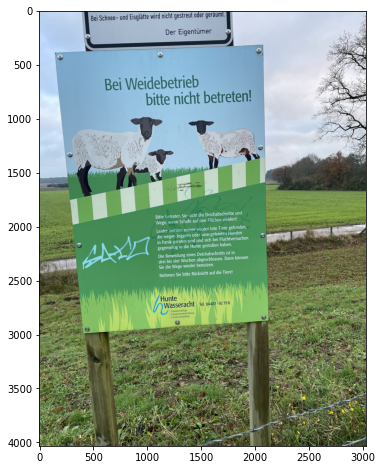

In [5]:
# Set image
img = cv.imread('/content/drive/My Drive/IMG_5406.png')

# Create a list to store all preprocessed versions
# TODO: CHANGE LIST TO DICT OR SOMETHING TO PREVENT DUPES !!!!!!!!!
preprocessed_list = []

# Add the original image to the list
preprocessed_list.append(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.figure(figsize=(8, 8))
plt.imshow(preprocessed_list[0])

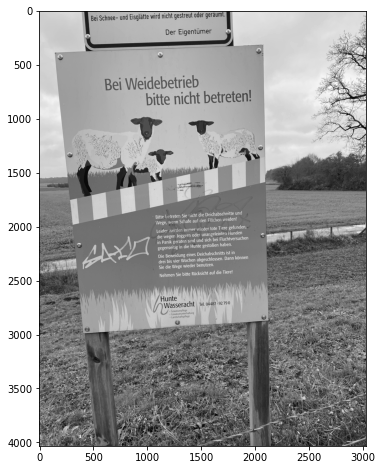

In [7]:
# Create a grayscale copy
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Output image
fig = plt.figure(figsize=(8,8))
plt.imshow(img_gray, cmap = "gray")

# Add greyscale copy to preprocessed List
#img_gray = cv.merge((img_gray,img_gray,img_gray)) # Hack for 3 gray channels
preprocessed_list.append(cv.merge((img_gray, img_gray, img_gray)))

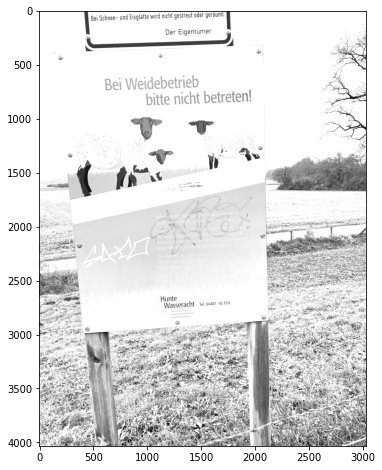

In [8]:
alpha = 2 # Contrast
beta = 0 # Brightness

# Change contrast (grayscale)
img_gray_highK = cv.convertScaleAbs(img_gray, alpha=alpha, beta=beta)

# Show plot
plt.figure(figsize=(8,8))
plt.imshow(img_gray_highK, cmap='gray')

# Add high contrast greyscale copy to preprocessed list
preprocessed_list.append(cv.merge((img_gray_highK,img_gray_highK, img_gray_highK)))

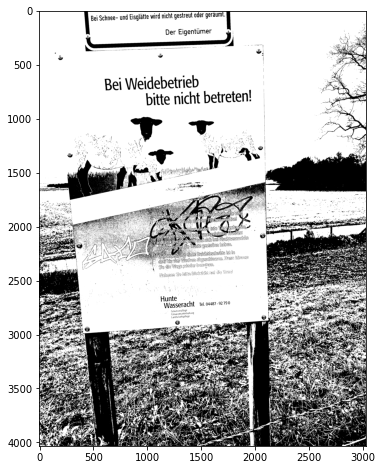

In [9]:
# Create a binary copy using thresholding
threshold = 110
ret, img_bin = cv.threshold(img_gray,threshold,255,cv.THRESH_BINARY) 

# Output image
fig = plt.figure(figsize=(8,8))
plt.imshow(img_bin, cmap = "gray")

# Add binary copy to preprocessed List
preprocessed_list.append(cv.merge((img_bin, img_bin, img_bin)))

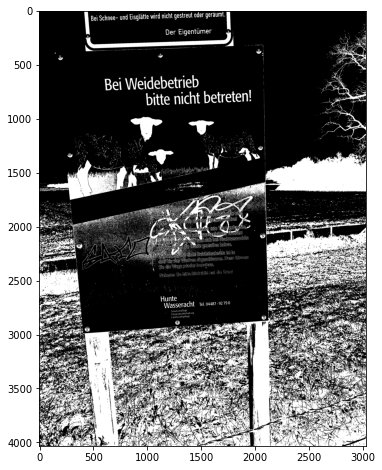

In [10]:
#create an inverted binary image using thresholding
threshold = 110
ret, img_bin_inv = cv.threshold(img_gray,threshold,255,cv.THRESH_BINARY_INV) 

# Output image
fig = plt.figure(figsize=(8,8))
plt.imshow(img_bin_inv, cmap = "gray")

# Add binary copy to preprocessed List
preprocessed_list.append(cv.merge((img_bin_inv, img_bin_inv, img_bin_inv)))

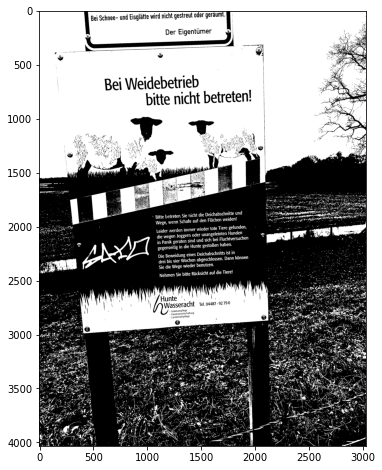

In [11]:
#create a binary image using otsu thresholding (optimum global thresholding)
ret, img_bin_otsu = cv.threshold(img_gray,0,255,cv.THRESH_OTSU) 

# Output image
fig = plt.figure(figsize=(8,8))
plt.imshow(img_bin_otsu, cmap = "gray")

# Add binary copy to preprocessed List
preprocessed_list.append(cv.merge((img_bin_otsu, img_bin_otsu, img_bin_otsu)))

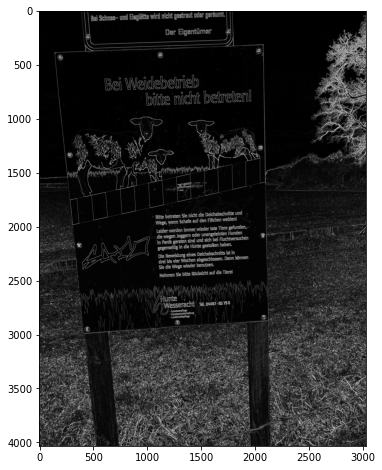

In [14]:
# Apply edge-detection using sobel filter on the grayscale picture
scale = 1
delta = 0
ddepth = cv.CV_16S
# Reduce noise using gaussian blur
src = cv.GaussianBlur(img, (3, 3), 0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

grad = cv.merge((grad, grad, grad)) # Hack for 3 gray channels

preprocessed_list.append(grad)

fig = plt.figure(figsize=(8,8))
plt.imshow(grad, cmap = "gray")

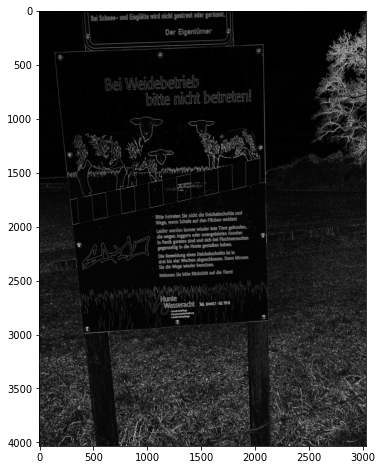

In [16]:
# Apply edge detection using laplace filter on grayscale filter
# src : https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
 # Declare the variables we are going to use
ddepth = cv.CV_16S
kernel_size = 3
 # reduce noise with gaussian blur
src = cv.GaussianBlur(img, (3, 3), 0)
#convert image to gray
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

#apply laplace function
dst = cv.Laplacian(gray, ddepth, ksize = kernel_size)
#convert back to uint8 TODO: research why :D
dst = cv.convertScaleAbs(dst)

dst = cv.merge((dst, dst, dst)) # hack for 3 gray channels

preprocessed_list.append(dst)

#plot
fig = plt.figure(figsize=(8,8))
plt.imshow(dst, cmap = "gray")

In [ ]:
# Plot histograms for the pictures in the processing list
histsize = 256
histrange = [0, histsize]

fig = plt.figure(figsize=(45, 10)) 
# Histogram for BGR
ax1 = fig.add_subplot(1, len(preprocessed_list), 1)
ax1.title.set_text('BGR')
bgr_planes = cv.split(img)

hist_b = cv.calcHist([bgr_planes[0]],[0],None,[histsize],histrange)
hist_b = hist_b / hist_b.sum()
hist_g = cv.calcHist([bgr_planes[1]],[0],None,[histsize],histrange)
hist_g = hist_g / hist_g.sum()
hist_r = cv.calcHist([bgr_planes[2]],[0],None,[histsize],histrange)
hist_r = hist_r / hist_r.sum()
plt.xlim([0, 256])
plt.ylim([0,0.05])
plt.plot(hist_b,'b')
plt.plot(hist_g,'g')
plt.plot(hist_r,'r')

# histogram for grayscale
ax2 = fig.add_subplot(1, len(preprocessed_list), 2)
hist_gray = cv.calcHist([img_gray],[0],None,[histsize],histrange)
hist_gray = hist_gray / hist_gray.sum()
ax2.title.set_text('grayscale')
plt.ylim([0,0.04])
plt.plot(hist_gray,'gray')

# histogram for grayscale high contrast
ax3 = fig.add_subplot(1, len(preprocessed_list), 3)
hist_gray_hc = cv.calcHist([img_gray_highK],[0],None,[histsize],histrange)
hist_gray_hc  = hist_gray_hc / hist_gray_hc.sum()
ax3.title.set_text('high contrast grayscale')
plt.ylim([0,0.04])
plt.plot(hist_gray_hc,'gray')

# histogram for binary
ax4 = fig.add_subplot(1, len(preprocessed_list), 4)
hist_bin = cv.calcHist([img_bin],[0],None,[histsize],histrange)
hist_bin = hist_bin / hist_bin.sum()
ax4.title.set_text('binary')
plt.ylim([0,0.8])
plt.plot(hist_bin,'black') 

# histogram for sobel
ax5 = fig.add_subplot(1, len(preprocessed_list), 5)
hist_grad = cv.calcHist([grad],[0],None,[histsize],histrange)
hist_grad = hist_grad / hist_grad.sum()
ax5.title.set_text('Sobel')
plt.plot(hist_grad, 'gray')

[INFO] Initializing text detection with EAST [1/10]
[INFO] text detection took 0.643961 seconds
[INFO] Initializing text detection with EAST [2/10]
[INFO] text detection took 0.663379 seconds
[INFO] Initializing text detection with EAST [3/10]
[INFO] text detection took 0.619803 seconds
[INFO] Initializing text detection with EAST [4/10]
[INFO] text detection took 0.633932 seconds
[INFO] Initializing text detection with EAST [5/10]
[INFO] text detection took 0.638166 seconds
[INFO] Initializing text detection with EAST [6/10]
[INFO] text detection took 0.599023 seconds
[INFO] Initializing text detection with EAST [7/10]
[INFO] text detection took 0.564959 seconds
[INFO] Initializing text detection with EAST [8/10]
[INFO] text detection took 0.624939 seconds
[INFO] Initializing text detection with EAST [9/10]
[INFO] text detection took 0.661879 seconds
[INFO] Initializing text detection with EAST [10/10]
[INFO] text detection took 0.621686 seconds


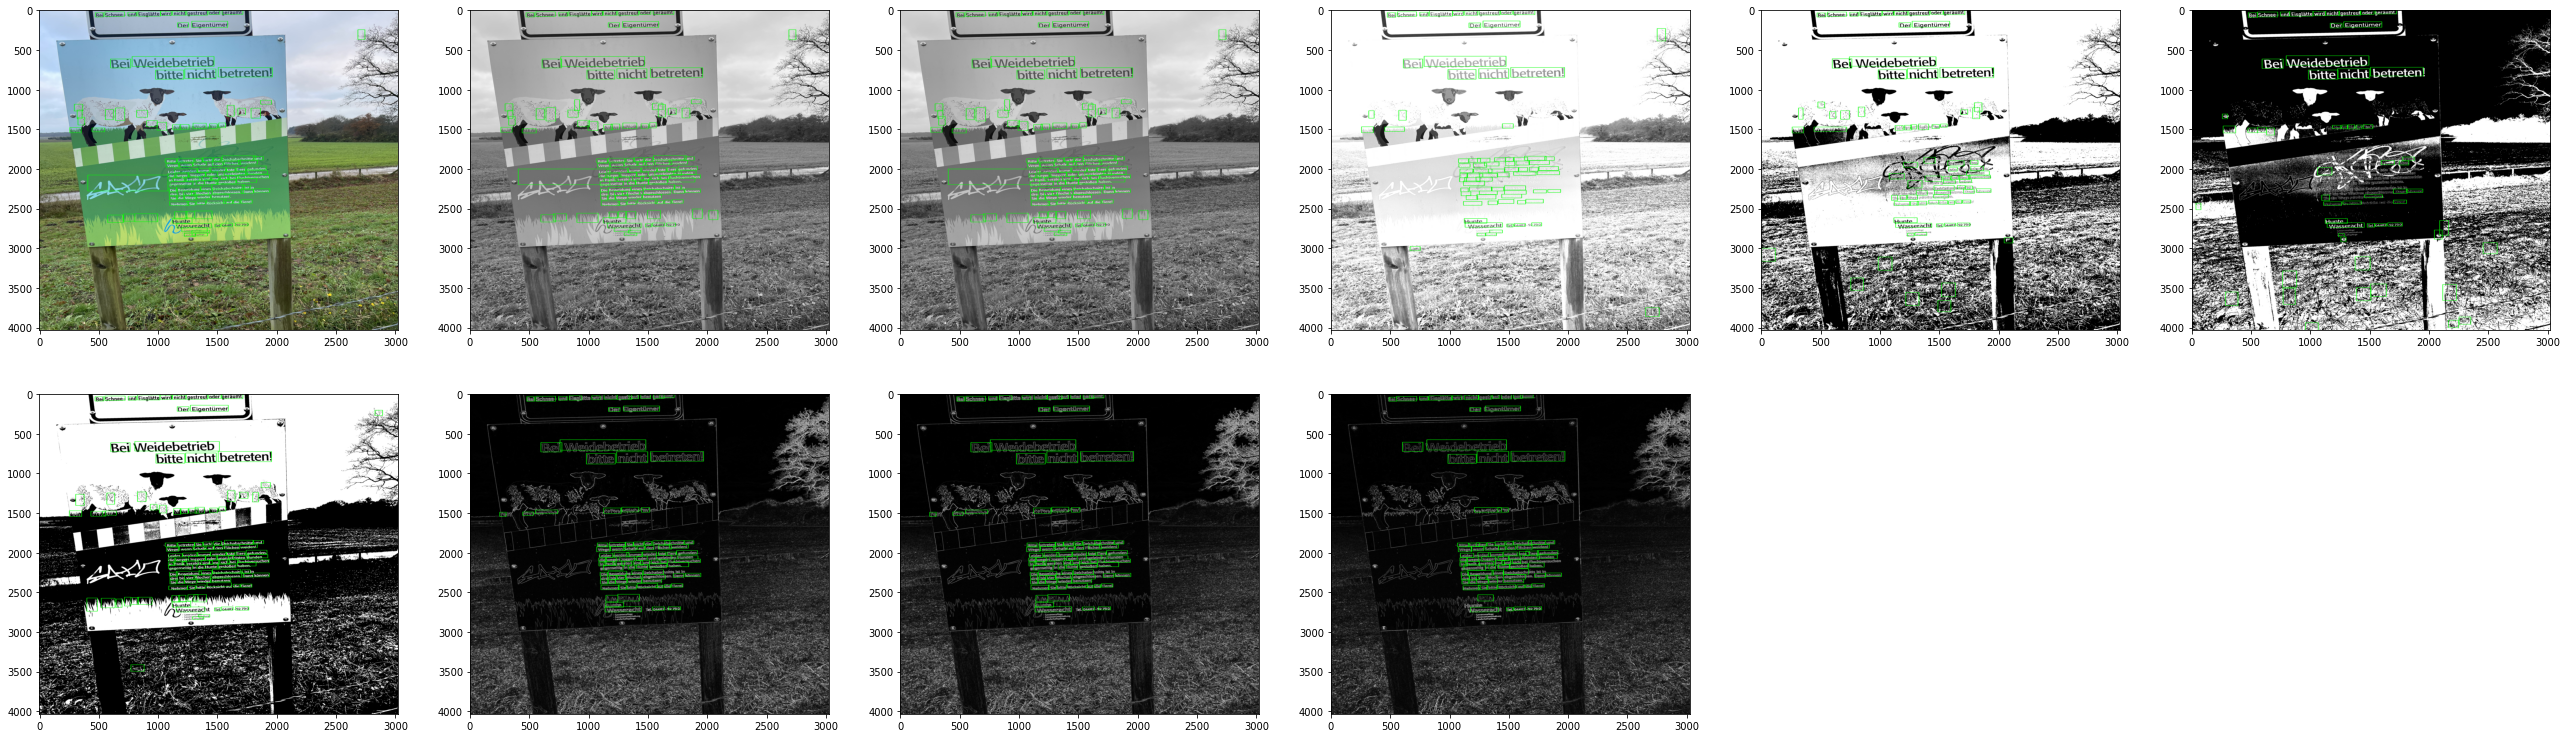

In [21]:
# Use EAST 
# Source: https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/
from imutils.object_detection import non_max_suppression
import time

# Create list that will contain cordinates of found text boxes for each image
boxes_list = []

# Set min confidence for text detection
min_score = 0.99 # Adjustable

# Set scaling resolution, must be multiple of 32 for EAST
res = 1280 # 1280x1280 works good

# Figure containing output images
fig = plt.figure(figsize=(45,20))


for index, preprocessed_img in enumerate(preprocessed_list):
	# Create copy and grab image dimensions
	orig = preprocessed_img.copy()
	orig_rectangles = preprocessed_img.copy()
	(H, W) = orig.shape[:2]

	# Adjust image dimensions
	(newW, newH) = (res, res)
	rW = W / float(newW)
	rH = H / float(newH)

	preprocessed_img = cv.resize(preprocessed_img, (newW, newH))
	(H, W) = preprocessed_img.shape[:2]

	# 2 layers are needed, the confiidences of the predictions and koordinates of found Text
	layerNames = [
		"feature_fusion/Conv_7/Sigmoid",
		"feature_fusion/concat_3"]

	# Load EAST
	print("[INFO] Initializing text detection with EAST [" + str(index + 1) + "/" + str(len(preprocessed_list)) + "]")
	net = cv.dnn.readNet('/content/drive/My Drive/frozen_east_text_detection.pb')
	net.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
	net.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA)

	# Create a "blob" and generate output using the trained model
	blob = cv.dnn.blobFromImage(preprocessed_img, 1.0, (W, H),(123.68, 116.78, 103.94), swapRB=True, crop=False)
	start = time.time()
	net.setInput(blob)
	(scores, geometry) = net.forward(layerNames)
	end = time.time()

	print("[INFO] text detection took {:.6f} seconds".format(end - start))
 
	# Grab the number of rows and columns from the scores volume, then
	# initialize our set of bounding box rectangles and corresponding
	# confidence scores
	(numRows, numCols) = scores.shape[2:4]
	rects = []
	confidences = []

	# Iterate the rows
	for y in range(0, numRows):
		# Extract the scores alongside the cordinates of found text
		scoresData = scores[0, 0, y]
		xData0 = geometry[0, 0, y]
		xData1 = geometry[0, 1, y]
		xData2 = geometry[0, 2, y]
		xData3 = geometry[0, 3, y]
		anglesData = geometry[0, 4, y]

		# Iterate columns
		for x in range(0, numCols):
			# Ignore scores below the threshold
			if scoresData[x] < min_score:
				continue
			# Calculate offset factor as our resulting feature maps will
			# be 4x smaller than the input image
			(offsetX, offsetY) = (x * 4.0, y * 4.0)
			# Calculate rotation angle
			angle = anglesData[x]
			cos = np.cos(angle)
			sin = np.sin(angle)
			# Calculate width and height of the bounding box
			h = xData0[x] + xData2[x]
			w = xData1[x] + xData3[x]
			# Caclulate cordinates of the bounding box
			endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
			endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
			startX = int(endX - w)
			startY = int(endY - h)
			# Add the bounding box coordinates and probability score to
			# our respective lists
			rects.append((startX, startY, endX, endY))
			confidences.append(scoresData[x])
		
	# Apply non-maxima suppression to suppress weak, overlapping bounding boxes
	boxes = non_max_suppression(np.array(rects), probs=confidences)

	# Iterate all boxes of an image
	for (startX, startY, endX, endY) in boxes:
		# Rescale the boxes
		startX = int(startX * rW)
		startY = int(startY * rH)
		endX = int(endX * rW)
		endY = int(endY * rH)
		# Draw boxes in output image
		cv.rectangle(orig_rectangles, (startX, startY), (endX, endY), (0, 255, 0), 3)

	# Add boxes to list containing all boxes for an image
	boxes_list.append(boxes)

	# Add output image to plot
	fig.add_subplot(3,6,index+1)
	plt.imshow(orig_rectangles, cmap='gray', aspect='auto')

# Display plot
plt.show()

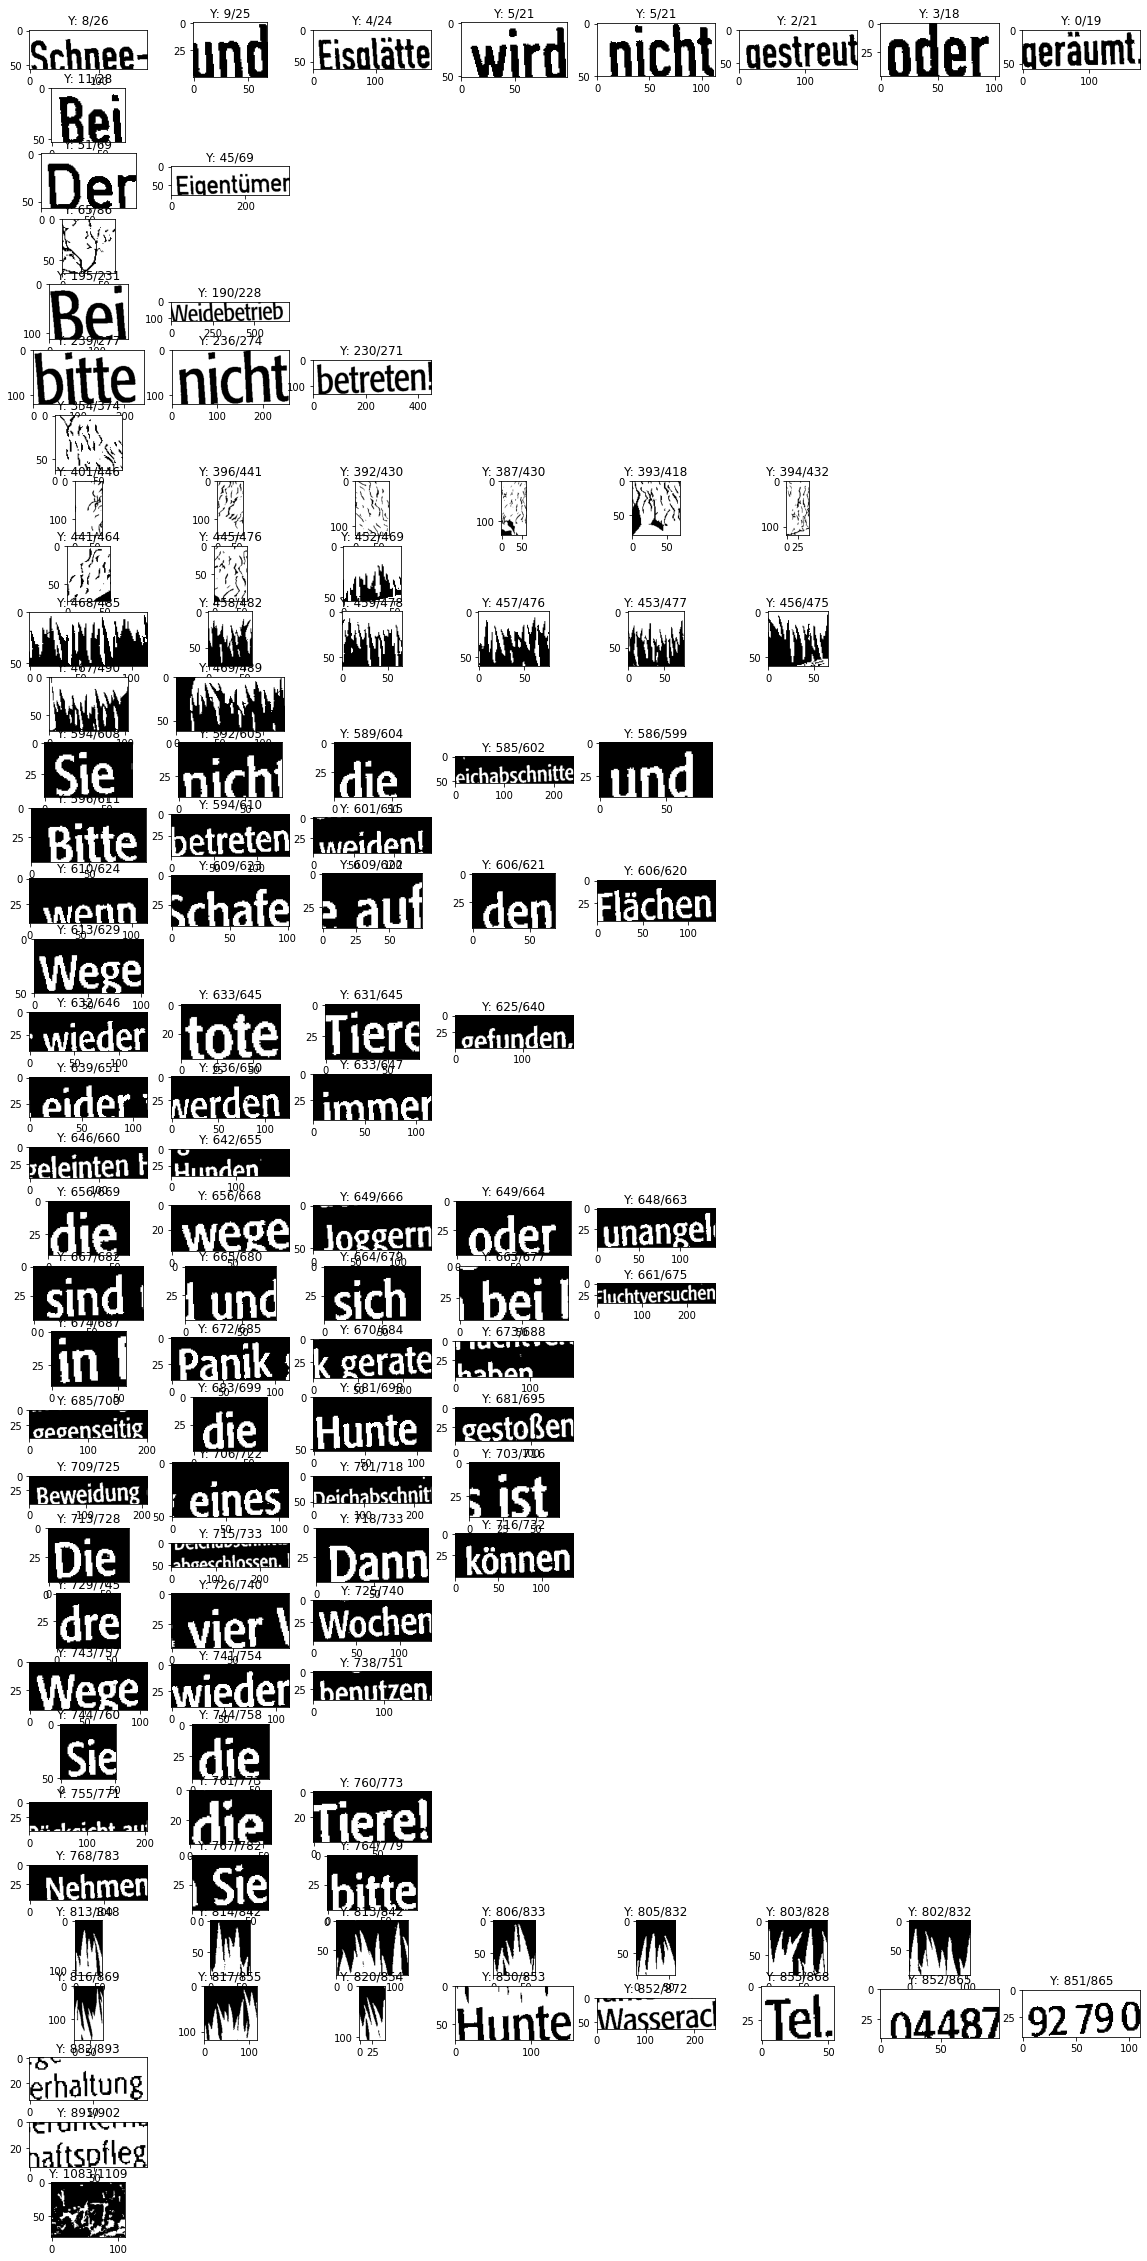

In [23]:
img_index = 6 # Set target index
margin = 0 # To account for inaccuracy set amount to increase each boundary by TODO: Prevent image border breaking!

# Create figure that will contain all cropped text areas (boxes)
fig = plt.figure(figsize=(25, 60))

def get_center(box):
    center_y = (box[1] + box[3]) / 2
    return int(center_y)

# Check if any text was found before proceeding
if len(boxes_list[img_index]) == 0:
  raise SystemExit("List is empty")

# Sort each boxes array
sorted_boxes = []

rect_list = boxes_list[img_index].tolist()
rect_list = sorted(rect_list, key=lambda k: [k[1], k[0]])

row = []

while(len(rect_list) > 0):
  curr_startY = int(rect_list[0][1])
  curr_endY  = int(rect_list[0][3])
  y_range = range(curr_startY, curr_endY)

  for rect in rect_list: 
    if len(rect_list) > 0:
      if get_center(rect) in y_range:
        row.append(rect)
  rect_list = [i for i in rect_list if i not in row]

  rect_list = sorted(rect_list, key=lambda k: [k[1], k[0]])
  row = sorted(row, key=lambda k: [k[0], k[1]])
  sorted_boxes.append(row)
  row = []

# Crop all found boxes and plot them
for index, elem in enumerate(sorted_boxes):
  for index2, (startX, startY, endX, endY)  in enumerate(elem):
    cropped_img = preprocessed_list[img_index]
    cropped_img = cropped_img[int(startY * rH - margin):int(endY * rH + margin), int(startX * rW - margin):int(endX * rW + margin)]
    ax = fig.add_subplot(50, 10, index2+1+index*10)
    ax.title.set_text('Y: ' + str(startY) + '/' + str(endY))
    plt.imshow(cropped_img)


# Show cropped text 
plt.show()

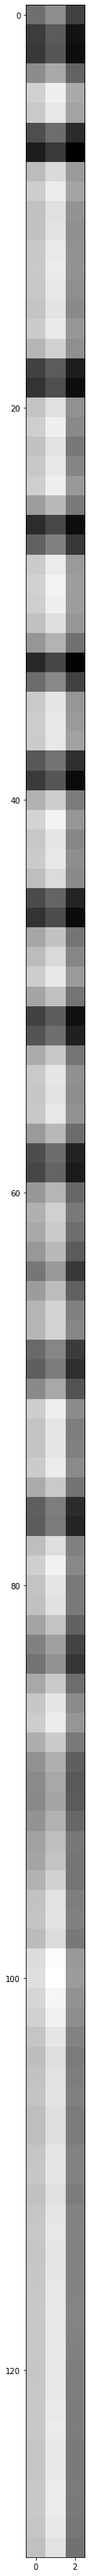

In [25]:
# this does not work yet! 
# purpose is to give functions to crop textboxes for each picture

margin = 0

def get_center(box):
    center_y = (box[1] + box[3]) / 2
    return int(center_y)

def sort_boxes(boxes_list, img_index):
  if len(boxes_list[img_index]) == 0:
    raise SystemExit("List is empty")

  # Sort each boxes array
  sorted_boxes = []

  rect_list = boxes_list[img_index].tolist()
  rect_list = sorted(rect_list, key=lambda k: [k[1], k[0]])

  row = []

  while(len(rect_list) > 0):
    curr_startY = int(rect_list[0][1])
    curr_endY  = int(rect_list[0][3])
    y_range = range(curr_startY, curr_endY)

    for rect in rect_list: 
      if len(rect_list) > 0:
        if get_center(rect) in y_range:
          row.append(rect)
    rect_list = [i for i in rect_list if i not in row]

    rect_list = sorted(rect_list, key=lambda k: [k[1], k[0]])
    row = sorted(row, key=lambda k: [k[0], k[1]])
    sorted_boxes.append(row)
    row = []
  return sorted_boxes 



# Crop all found boxes and plot them
def crop_images(sorted_boxes, img_index):
  # Crop all found boxes and plot them
  for index, elem in enumerate(sorted_boxes):
    for index2, (startX, startY, endX, endY)  in enumerate(elem):
      cropped_img = preprocessed_list[img_index]
      cropped_img = cropped_img[int(startY * rH - margin):int(endY * rH + margin), int(startX * rW - margin):int(endX * rW + margin)]
  return cropped_img;

cropped_images_list = []

for i in range(0, len(preprocessed_list)):
  sorted_boxes = sort_boxes(boxes_list, i)
  cropped_images_list.append(crop_images(sorted_boxes, i))

# Plot cropped images for one of the images 
# TODO use some values for figsize that actually make sense
fig = plt.figure(figsize=(25, 60))

cropped_images = cropped_images_list[0]
plt.imshow(cropped_images[0], cmap='gray')


In [24]:
# Install English and German tesseract
!sudo apt install tesseract-ocr tesseract-ocr-deu 
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-deu tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 5,539 kB of archives.
After this operation, 17.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-deu all 4.00~git24-0e00fe6-1.2 [744 kB]
Fetched 5,539 kB in 1s (4,170 kB/s)
debconf: unable to initialize f

In [26]:
# Source for Tesseract config and usage: https://jaafarbenabderrazak-info.medium.com/opencv-east-model-and-tesseract-for-detection-and-recognition-of-text-in-natural-scene-1fa48335c4d1
# Recognize text using tesseract 
import pytesseract

results = []

for index, elem in enumerate(sorted_boxes):
  for index2, (startX, startY, endX, endY)  in enumerate(elem):
    cropped_img = preprocessed_list[img_index]
    cropped_img = cropped_img[int(startY * rH - margin):int(endY * rH + margin), int(startX * rW - margin):int(endX * rW + margin)]

    # configuration setting to convert image to string   <<- Check other CONFIG
    configuration = ("-l deu --oem 1 --psm 8")  

    # this will recognize the text from the image of bounding box
    text = pytesseract.image_to_string(cropped_img, config=configuration)
    text = "".join([x if ord(x) < 128 else "" for x in text]).strip()

    # append bbox coordinate and associated text to the list of results 
    results.append(text)

for txt in results:
  print("{}\n".format(txt), end = " ")

wr
 nicht
 gest
 alf
 oder
 ner
 raum!
 ai
 Schnee-
 ung
 Eisqltte
 Ner
 Ziaentmer
 Dei
 \Alsirlahatrieh
 hitte
 nicht
 betreten!
 ac Jialfkhiuhlu
 aA
 AS
 KNTy
 BEIN,
 PS
 Neichabs
 schnitte
 Ant
 ES
 betre
 PREIS
 AN
 BT,
 Schafe
 Ft,
 den
 Era)
 nn
 Re
 er
 BER RERTE
 vorm
 NN
 immer
 EITEe Te
 Jogger
 Dr
 unans
 CH
 Fr
 tn
 PeNe
 CC
 It
 Kt:
 Rei
 IE
 BERN
 haben.
 ogenseitig |
 Fr
 ic
 Die
 BARRIERE
 NE
 PUCREBR.
 Beh)
 Pe
 Pe
 BT
 ara
 NTAYG
 abgeschlos
 Sie
 die
 Re
 LT
 benutzen.
 Rcksich
 FT;
 Al
 E37]
 Nehmen
 Er:
 PinR
 IN
 Alacserach
 Tel.
 A487
 9790
 